# Exploratory Analysis (House Prices)

## Description
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With `79 explanatory` variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## <font color=gray> Dataframe main characteristics.</font>

In [2]:
df = pd.read_csv('data/train.csv')
print ('Dataframe shape: ',df.shape)
print ('_____________________ \n ')
print ( 'Df columns: \n', df.columns)
print ('_____________________ \n ')

null_columns=df.columns[df.isnull().any()]
print (' Missing Data: \n', df[null_columns].isnull().sum())

Dataframe shape:  (1460, 81)
_____________________ 
 
Df columns: 
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'Garag

`80 features plus one label` (int64), with some of them categorical (object) and numerical (int and float).

## <font color=gray> Missing Values .</font>

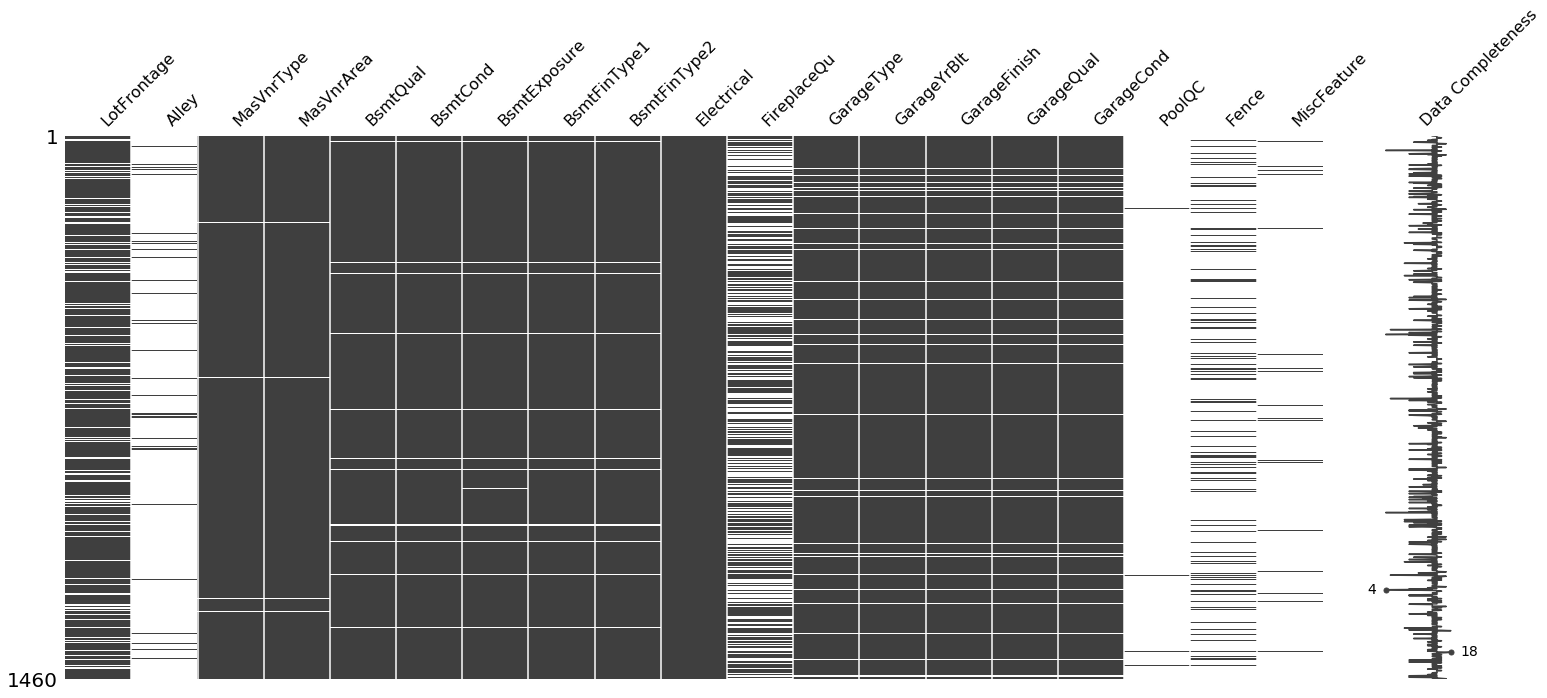

In [3]:
import missingno as msno
msno.matrix(df[null_columns],labels=True)
plt.show()

**Missing NaNs are not so bad here....**
1. `PoolQC`: NaNs for the houses without swimming pools | **object(CAT)**
2. `Fence`: NaNs when there are not fence | **obejct(CAT)**
3. `MiscFeature`: 54 with value (49 with shed) | **object(CAT)**
4. `FireplaceQu` --> NaN is not fireplace --> keep. | **object(CAT)**
5. `Alley` --> NaN is no Alley | **object(CAT)**
6. `MasVnrType` --> 8 NaNs. Majority of category is None, so we map NaN to None. | **object(CAT)**
7. `GarageType`--> Na is no garage (dummy create column nan) | **object(CAT)**
8. `GarageYrBlt` --> Na is no Garage. This variable is Year of construction. We will drop this variable. | **int64**
9. `GarageFinish` --> Na is no Garage. (dummy create column nan) | **object(CAT)**
10. `GarageQual`--> Na is no Garage. (dummy create column nan) | **object(CAT)**
11. `GarageCond` --> NA is no garage. (dummy create column nan) | **object(CAT)**
12. `Electrical` --> Na is no data --> Replace for most common | **object(CAT)**
13. `BsmtCond`--> Na is no Basement | **object(CAT)**
14. `BsmtExposure` --> Na no Basement | **object(CAT)**
15. `BsmtFinType1` --> Na no Basement | **object(CAT)**
16. `BsmtFinType2` --> Na no Basement | **object(CAT)**
17. `BsmtQual`--> Na is no Basement | **object(CAT)**

**Missing NaNs more complicated**
1. `LotFrontage` : linear feet of street connected to property --> 259 NaNs. Why? NaN es 0? 0 have sense here? impute nan values with mean?
2. `MasVnrArea`: the 8 NaNs are mapped to 0(same than MasVNrType)


**Procedures:**  
`Create new columns with *No_feature*`: PoolQC, Fence, MiscFeature, FireplaceQu, Alley, GarageType, GarageFinish, GarageQual, GarageCond, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2,BsmtQual

`Replace with most commmon`: Electrical,MasVnrType,MasVnrArea

`Replace with mean values`: LotFrontage

In [4]:
# REPLACE NANS FOR NO_F
column_list=['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Alley', 'GarageType', 'GarageFinish',
             'GarageQual', 'GarageCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','BsmtQual']
df[column_list] = df[column_list].replace(np.nan,'No_F')

In [5]:
# IMPUTE NANS FOR LOTFRONTAGE WITH MEAN STRATEGY
from sklearn.impute import SimpleImputer
column_list=['LotFrontage']
imp_mean= SimpleImputer(missing_values=np.nan, strategy='mean')
df[column_list] = pd.DataFrame(imp_mean.fit_transform(df[column_list]))

In [6]:
# IMPUTE NANS WITH MOST COMMON STRATEGY
from sklearn.impute import SimpleImputer
column_list=['Electrical','MasVnrType','MasVnrArea']
imp_mean= SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[column_list] = pd.DataFrame(imp_mean.fit_transform(df[column_list]))

In [7]:
df[['MasVnrArea']]=df[['MasVnrArea']].astype('int64')

In [8]:
null_columns=df.columns[df.isnull().any()]
print (' Missing Data: \n', df[null_columns].isnull().sum())

 Missing Data: 
 GarageYrBlt    81
dtype: int64


**Missing values summary:**

<font color=green> Filled missing values for PoolQC, Fence, MiscFeature, FireplaceQu, Alley, GarageType, GarageFinish, GarageQual, GarageCond, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2,BsmtQual,Electrical,MasVnrType,MasVnrArea,LotFrontage  .</font>

<font color=red> NOT Filled missing values for GarageYrBlt.</font>

## <font color=gray> EDA</font>
    
### <font color=gray>CATEGORICAL DATA</font>

EDA plots for categorical data

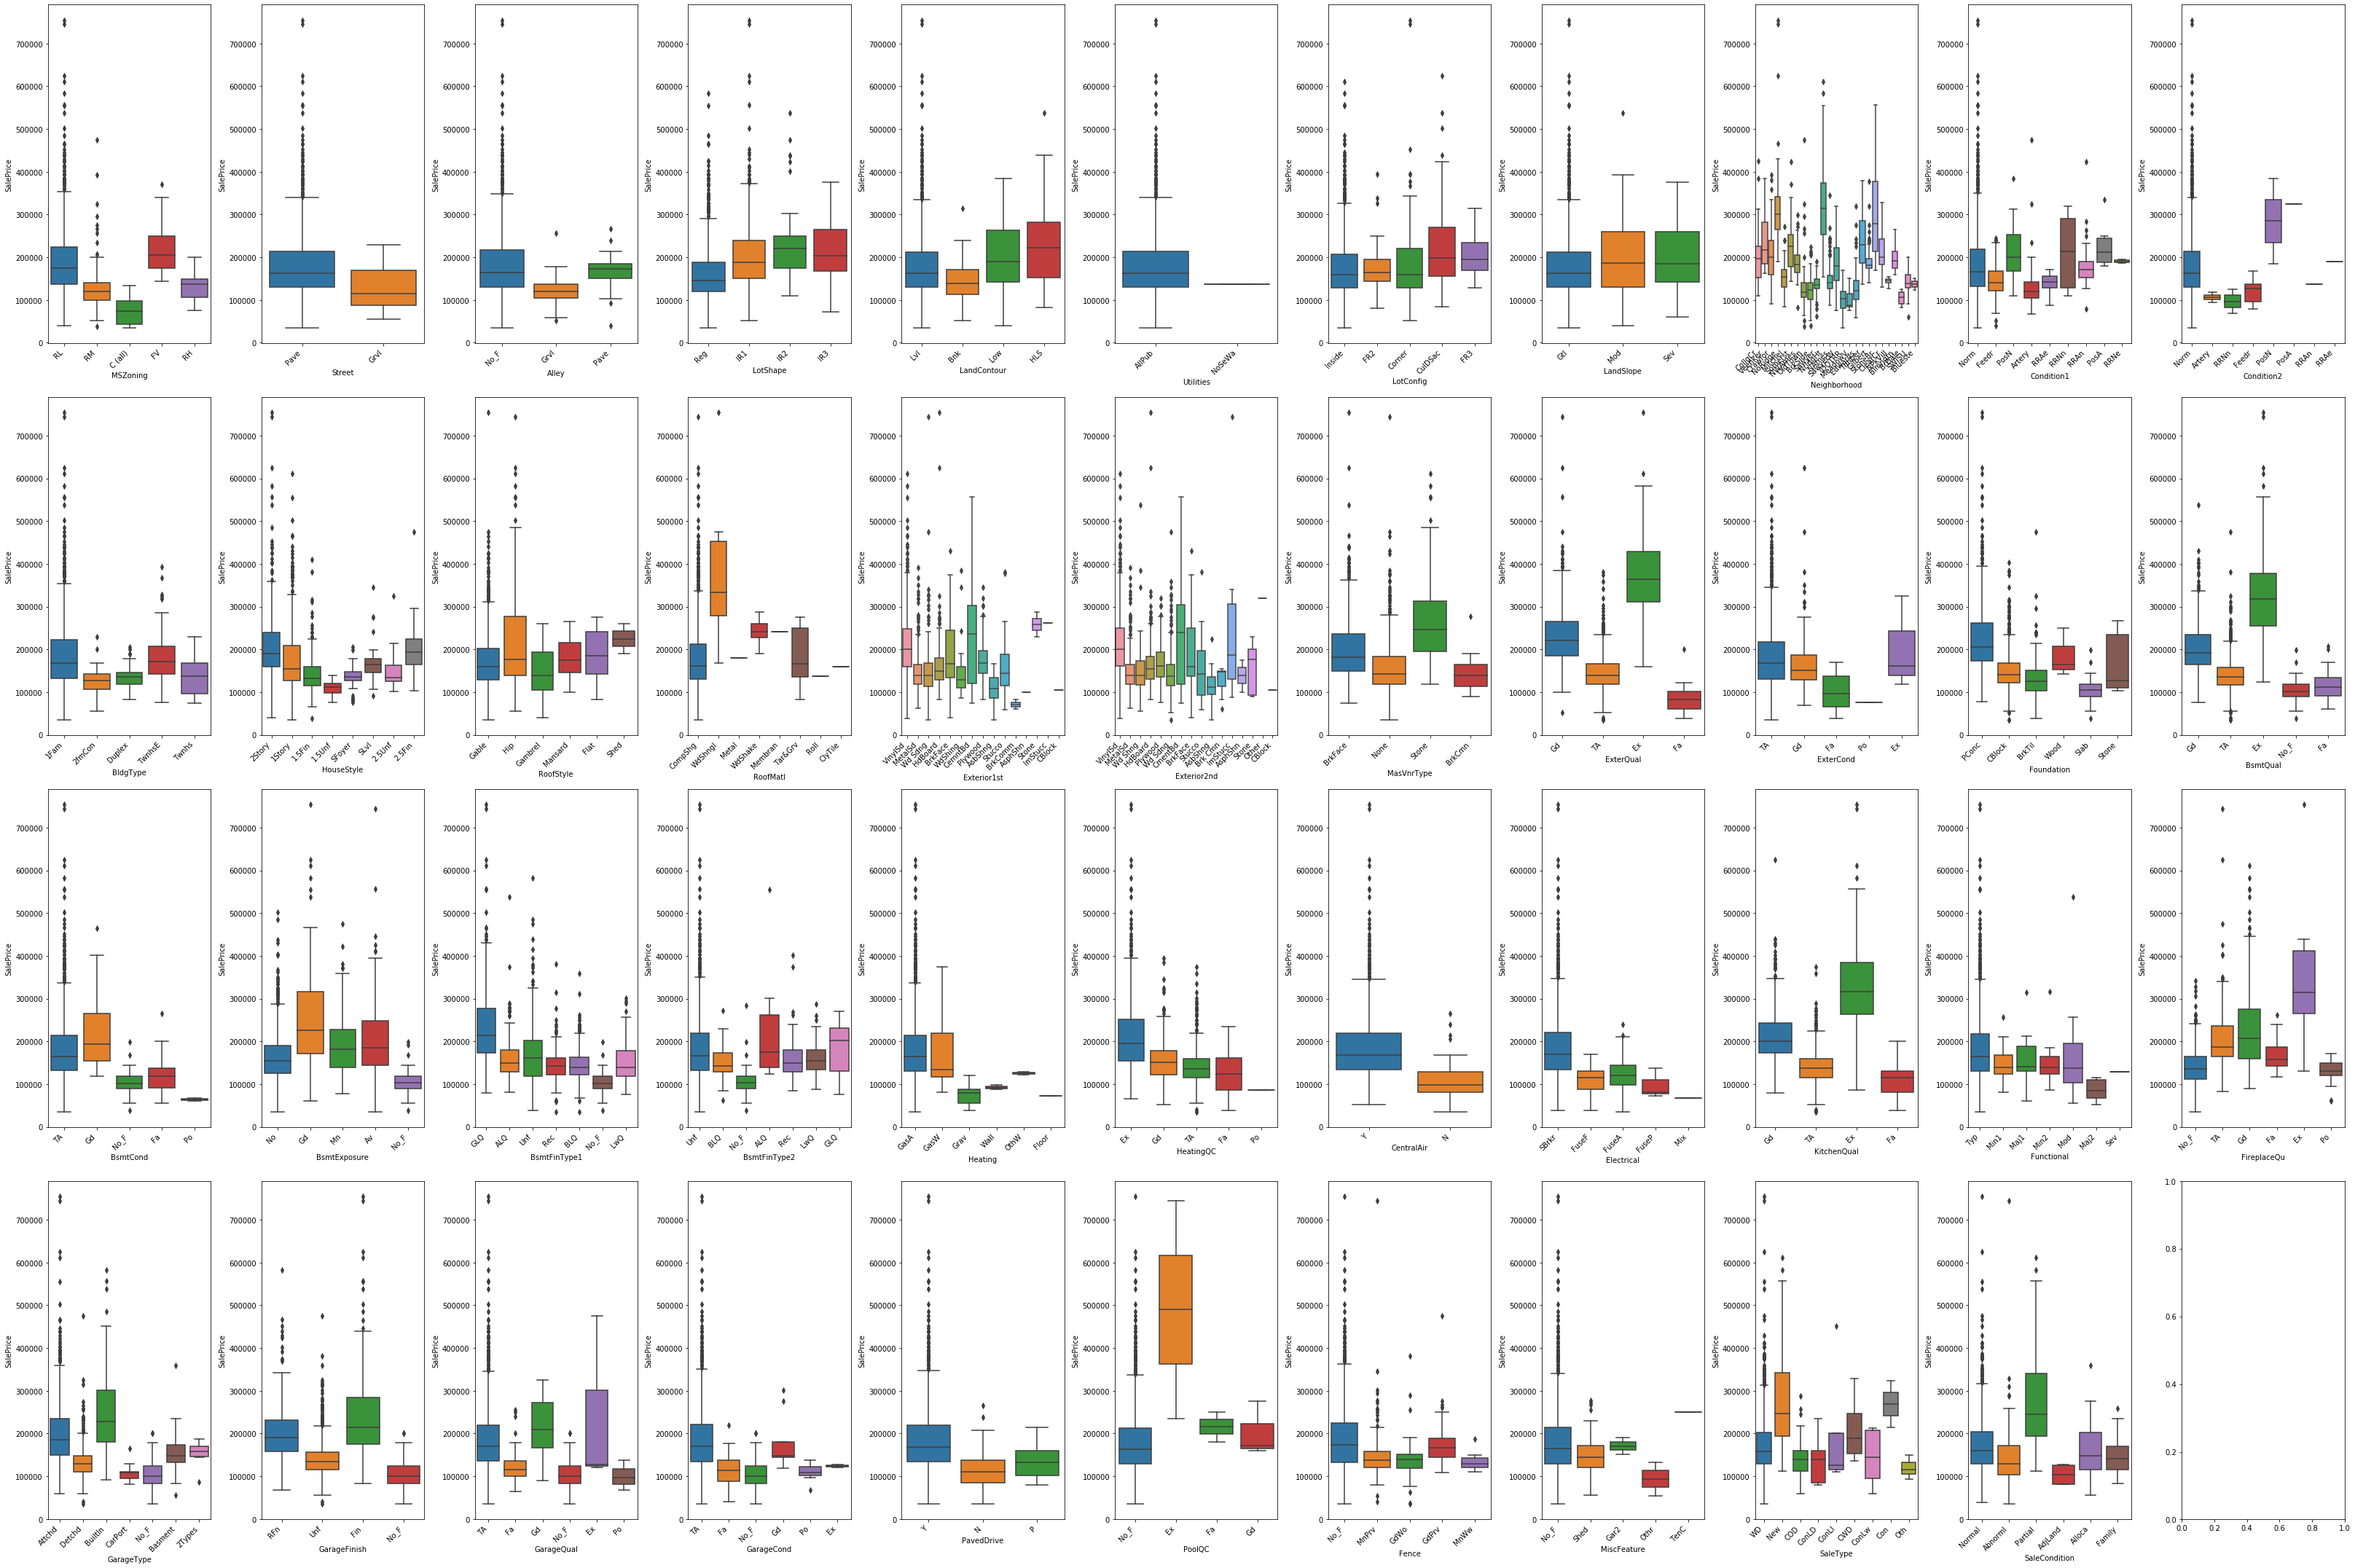

In [37]:
%matplotlib inline
import seaborn as sns

#USE ONLY CATEGORICAL COLUMNS
df_cat = df.select_dtypes(include=['object'])
column_list=df_cat.columns

df_cat=pd.concat([df_cat,df[['SalePrice']]],axis=1)

fig, axs = plt.subplots(4,11,figsize=(45,30))
rect = fig.patch
rect.set_facecolor('white')
axs = axs.flatten()

for i,(ax, feature) in enumerate (zip(axs, column_list)):
    boxplot= sns.boxplot(data=df_cat,x=feature, y='SalePrice',ax=ax,)
    boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()

Que veiem amb les variables categoriques?: (podriem treure alguna taula amb estadistiques aqui?)
1. Variables que mostrin variabilitat alta en Preu segons feature:   
   -MSZoning, Neighborhood, Condition1, Condition2, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentraiAir, Electrical, KitchenQual, FireplaceQu,GarageType, GarageFinish, GarageQual, PoolQC, SaleType, SaleCondition 
2. Variabilitat mitjana:  
    -Street,Alley,LotShape, LandContour,LotConfig, BidgType, Functional, GarageCond, PaveDrive, MiscFeature, 
3. Independents de la categoria:  
    -Utilities, LandSlope, Fence, 

In [ ]:
STOP()

In [ ]:
df.info()

## find nans and nulls

## Comencem amb algunes features (les mes tipiques)

In [ ]:
df = df[['MSZoning','LotFrontage','LotArea','Utilities','LotConfig','Neighborhood','BldgType','HouseStyle',
          'OverallQual','OverallCond','YearRemodAdd','TotalBsmtSF','Heating','1stFlrSF','2ndFlrSF','GrLivArea',
          'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars', 
           'GarageArea','PoolArea','YrSold','SalePrice']]

In [ ]:
y=df['SalePrice']

Per a les numeriques, hem deixat tant de valors continus (tamanys, metres lineals, etc), com dicrets (nombre labavos i Quality y condition , ja que van de 0 a 10!).
Si escalem dades, el YearRemodd ja quedarà tb ok.

In [ ]:
df_num=df[['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','TotalBsmtSF',
          '1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
          'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars','GarageArea','PoolArea','YrSold']]

df_num=df[['LotArea','OverallQual','OverallCond','YearRemodAdd','TotalBsmtSF',
          'GrLivArea','GarageCars']]

name_col_num= df_num.columns

In [ ]:
df_num.isnull().sum()

In [ ]:
# IMPUTE NANS FOR LOTFRONTAGE WITH MEAN STRATEGY
from sklearn.impute import SimpleImputer
imp_mean= SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df_num)

df_num = pd.DataFrame(imp_mean.transform(df_num), columns=name_col_num)
df_num.head()

In [ ]:
# STANDARIZE DATA USING STANDARDSCALER
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_num = pd.DataFrame(sc.fit_transform(df_num), columns=name_col_num)
df_num.head()

categorical Data

In [ ]:
df_cat= df[['MSZoning','Utilities','LotConfig','Neighborhood','BldgType','HouseStyle','Heating']]
df_cat= df[['Neighborhood','BldgType']]

In [ ]:
df_cat.head()

In [ ]:
df_cat = pd.get_dummies(df_cat,dummy_na=True, drop_first=True)

la idea seria fer una primera aproximacio amb model de LR Multinomial, amb un backward elimination per identificar variables destacades y provar validacion

In [ ]:
df1 = pd.concat([df_num,df_cat],axis=1)

In [ ]:
df1.shape

In [ ]:
## model multilineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.33, random_state=42)

LR=LinearRegression(n_jobs=-1)

In [ ]:
results = cross_val_score(LR, X_train, y_train, cv=6, scoring='neg_root_mean_squared_error')
#results = cross_val_score(LR, X_train, y_train, cv=6, scoring='r2')
print('R^2 (coefficient of determination) regression score function for the cross validation:',results.mean())

In [ ]:
y.hist()